# CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [66]:
import os
import numpy as np
import pandas as pd
from janitor import clean_names

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [67]:
ruta_proyecto = '../../'

Trabajo con el de trabajo.csv que he creado en el notebook anterior, el de la muestra que es el 70% de los registros

In [68]:
nombre_fichero_datos = 'trabajo.csv'

Cargar los datos.

In [69]:
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col='id', sep=',')
df

,origen,fuente,no_enviar_email,no_llamar,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,ult_actividad,ambito,ocupacion,conociste_google,conociste_revista,conociste_periodico,conociste_youtube,conociste_facebook,conociste_referencias,score_actividad,score_perfil,descarga_lm
id,,,,,,,,,,,,,,,,,,,,
660737,API,Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No,15.0,15.0,No
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,No,No,No,No,No,15.0,15.0,No
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,14.0,20.0,Yes
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,13.0,17.0,No
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,No,No,No,No,No,15.0,18.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,SMS Sent,Select,Unemployed,No,No,No,No,No,No,NaN,NaN,No
579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,SMS Sent,Media and Advertising,Unemployed,No,No,No,No,No,No,14.0,19.0,Yes
579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,SMS Sent,Business Administration,Unemployed,No,No,No,No,No,No,13.0,20.0,Yes


## CORRECCIÓN DE NOMBRES DE VARIABLES

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 660737 to 579533
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   origen                 6365 non-null   object 
 1   fuente                 6341 non-null   object 
 2   no_enviar_email        6365 non-null   object 
 3   no_llamar              6365 non-null   object 
 4   compra                 6365 non-null   int64  
 5   visitas_total          6278 non-null   float64
 6   tiempo_en_site_total   6365 non-null   int64  
 7   paginas_vistas_visita  6278 non-null   float64
 8   ult_actividad          6301 non-null   object 
 9   ambito                 5364 non-null   object 
 10  ocupacion              4495 non-null   object 
 11  conociste_google       6365 non-null   object 
 12  conociste_revista      6365 non-null   object 
 13  conociste_periodico    6365 non-null   object 
 14  conociste_youtube      6365 non-null   object 
 15  co

Los nombres estan bien, no hay problema con mayusculas espacios ni acentos ni otras cosas raras que haya detectado


In [71]:
df.head(5)

,origen,fuente,no_enviar_email,no_llamar,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,ult_actividad,ambito,ocupacion,conociste_google,conociste_revista,conociste_periodico,conociste_youtube,conociste_facebook,conociste_referencias,score_actividad,score_perfil,descarga_lm
id,,,,,,,,,,,,,,,,,,,,
660737,API,Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No,15.0,15.0,No
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,No,No,No,No,No,15.0,15.0,No
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,14.0,20.0,Yes
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,13.0,17.0,No
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,No,No,No,No,No,15.0,18.0,No


## TIPOS DE DATOS

### Identificación

In [72]:
df.dtypes

origen                    object
fuente                    object
no_enviar_email           object
no_llamar                 object
compra                     int64
visitas_total            float64
tiempo_en_site_total       int64
paginas_vistas_visita    float64
ult_actividad             object
ambito                    object
ocupacion                 object
conociste_google          object
conociste_revista         object
conociste_periodico       object
conociste_youtube         object
conociste_facebook        object
conociste_referencias     object
score_actividad          float64
score_perfil             float64
descarga_lm               object
dtype: object

Parece que todo esta bien salvo visitas_total

Cambiar esta por entero

### Corrección

In [73]:
df = df.astype({'visitas_total':'Int64'})

df.dtypes

origen                    object
fuente                    object
no_enviar_email           object
no_llamar                 object
compra                     int64
visitas_total              Int64
tiempo_en_site_total       int64
paginas_vistas_visita    float64
ult_actividad             object
ambito                    object
ocupacion                 object
conociste_google          object
conociste_revista         object
conociste_periodico       object
conociste_youtube         object
conociste_facebook        object
conociste_referencias     object
score_actividad          float64
score_perfil             float64
descarga_lm               object
dtype: object

## VALORES ÚNICOS

### Identificación

In [74]:
df.nunique().sort_values()

conociste_revista           1
descarga_lm                 2
conociste_referencias       2
no_enviar_email             2
no_llamar                   2
compra                      2
conociste_facebook          2
conociste_youtube           2
conociste_periodico         2
conociste_google            2
origen                      4
ocupacion                   6
score_perfil               10
score_actividad            11
fuente                     15
ult_actividad              17
ambito                     19
visitas_total              39
paginas_vistas_visita     102
tiempo_en_site_total     1593
dtype: int64

Parece que solo conociste_revista tiene un valor, la elimino

Tampoco hay ninguna variable que tenga demasiados valores y que me tenga que preocupar a nivel de cardinalidad

### Corrección

In [75]:
df.drop(columns = ['conociste_revista'], inplace = True)

## DUPLICADOS

### Identificación

In [76]:
df.duplicated().sum()

1047

Existen bastantes duplicados

### Corrección

In [77]:
df.drop_duplicates(inplace = True)

In [78]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [79]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [80]:
num = df.select_dtypes(include='number').copy()

In [81]:
cat

,origen,fuente,no_enviar_email,no_llamar,ult_actividad,ambito,ocupacion,conociste_google,conociste_periodico,conociste_youtube,conociste_facebook,conociste_referencias,descarga_lm
id,,,,,,,,,,,,,
660737,API,Chat,No,No,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No
660728,API,Organic Search,No,No,Email Opened,Select,Unemployed,No,No,No,No,No,No
660727,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,No,No,No,No,No,Yes
660719,Landing Page Submission,Direct Traffic,No,No,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No
660681,Landing Page Submission,Google,No,No,Converted to Lead,Select,Unemployed,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579622,API,Direct Traffic,No,No,SMS Sent,Select,Unemployed,No,No,No,No,No,No
579546,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Media and Advertising,Unemployed,No,No,No,No,No,Yes
579545,Landing Page Submission,Direct Traffic,Yes,No,SMS Sent,Business Administration,Unemployed,No,No,No,No,No,Yes


In [82]:
num

,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,score_actividad,score_perfil
id,,,,,,
660737,0,0,0,0.0,15.0,15.0
660728,0,5,674,2.5,15.0,15.0
660727,1,2,1532,2.0,14.0,20.0
660719,0,1,305,1.0,13.0,17.0
660681,1,2,1428,1.0,15.0,18.0
...,...,...,...,...,...,...
579622,1,13,1409,2.6,NaN,NaN
579546,0,2,238,2.0,14.0,19.0
579545,0,2,199,2.0,13.0,20.0


## GESTIÓN DE CATEGÓRICAS

### Nulos

#### Identificación

In [83]:
cat.isna().sum().sort_values(ascending = False)

ocupacion                1347
ambito                    478
ult_actividad              64
fuente                     18
origen                      0
no_enviar_email             0
no_llamar                   0
conociste_google            0
conociste_periodico         0
conociste_youtube           0
conociste_facebook          0
conociste_referencias       0
descarga_lm                 0
dtype: int64

En ocupacion hay bastantes nulos de 6.000 registros hay 1363 nulos en ocupacion. Pero no lo quito porque realmente ocupacion aunque no haya tanta informacion si que puede ser una de las variables mas interesantes a la hora de sacar predictibilidad.

#### Corrección

In [84]:
cat.ocupacion.value_counts()

ocupacion
Unemployed              3376
Working Professional     437
Student                  137
Other                      8
Housewife                  7
Businessman                6
Name: count, dtype: int64

La gran mayoria son desempleados, mejor imputar por la moda, asi los que no han dicho nada que sean desempleados

In [85]:
cat.ambito.value_counts()

ambito
Select                               857
Finance Management                   656
Marketing Management                 573
Human Resource Management            560
Operations Management                340
Business Administration              278
IT Projects Management               255
Supply Chain Management              237
Banking, Investment And Insurance    233
Media and Advertising                148
Travel and Tourism                   142
International Business               117
Healthcare Management                101
E-COMMERCE                            80
Hospitality Management                75
Retail Management                     66
Rural and Agribusiness                55
E-Business                            39
Services Excellence                   28
Name: count, dtype: int64

Puedo poner los nulos por la moda, como Select

In [86]:
cat.ult_actividad.value_counts()

ult_actividad
Email Opened                    2016
SMS Sent                        1615
Page Visited on Website          449
Chat Conversation                293
Converted to Lead                286
Email Bounced                    214
Email Link Clicked               149
Form Submitted on Website         83
Unreachable                       66
Unsubscribed                      46
Had a Phone Conversation          20
Approached upfront                 7
View in browser link Clicked       5
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Email Marked Spam                  1
Name: count, dtype: int64

Este no lo imputaria por la moda, ya que estos decir que la ultima actividad fue abrir un mail no tiene sentido, es arriesgar mucho. 

In [87]:
cat.fuente.value_counts()

fuente
Google               2001
Direct Traffic       1787
Organic Search        813
Chat                  333
Reference             235
Referral Sites         81
Facebook               35
google                  3
Click2call              3
bing                    3
Live Chat               2
blog                    1
Pay per Click Ads       1
Press_Release           1
Social Media            1
Name: count, dtype: int64

Hay muchos de google pero tambien de Direct Traffic, entonces no imputo por la moda, entonces lo imputo por desconocido

##### Eliminar registros

No elimino nada porque de num hay pocas variables, 6 solo, y realmente si borro de num tengo que borrar tambien de categorica

##### Imputar por un valor

###### Variables a imputar

In [88]:
var_imputar_valor = ['origen',
 'fuente',
 'no_enviar_email',
 'no_llamar',
 'ult_actividad',
 'conociste_google',
 'conociste_periodico',
 'conociste_facebook',
 'conociste_referencias',
 'descarga_lm']

Al final me doy cuenta que para la industrializacion lo mejor es pasar todas las variables que no sean ocupacion y ambito a un valor por si en un futuro entran estos "DESCONOCIDOS"

In [89]:
cat.columns.to_list()

['origen',
 'fuente',
 'no_enviar_email',
 'no_llamar',
 'ult_actividad',
 'ambito',
 'ocupacion',
 'conociste_google',
 'conociste_periodico',
 'conociste_youtube',
 'conociste_facebook',
 'conociste_referencias',
 'descarga_lm']

###### Valor por el que imputar

In [90]:
valor = 'DESCONOCIDO'

###### Imputar

In [91]:
cat[var_imputar_valor] = cat[var_imputar_valor].fillna(valor)

##### Imputar por la moda

###### Variables a imputar

In [92]:
var_imputar_moda = ['ocupacion','ambito']

###### Funcion para imputar con la moda

In [93]:
def imputar_moda(variable):
    return(variable.fillna(variable.mode()[0]))

###### Imputar con la moda

In [94]:
cat[var_imputar_moda] = cat[var_imputar_moda].apply(imputar_moda)

In [95]:
#Confirmo que no hay mas nulos

cat.isna().sum().sort_values()

origen                   0
fuente                   0
no_enviar_email          0
no_llamar                0
ult_actividad            0
ambito                   0
ocupacion                0
conociste_google         0
conociste_periodico      0
conociste_youtube        0
conociste_facebook       0
conociste_referencias    0
descarga_lm              0
dtype: int64

### Atípicos

#### Categorías poco frecuentes

In [96]:
cat.fuente.value_counts()

fuente
Google               2001
Direct Traffic       1787
Organic Search        813
Chat                  333
Reference             235
Referral Sites         81
Facebook               35
DESCONOCIDO            18
google                  3
Click2call              3
bing                    3
Live Chat               2
blog                    1
Pay per Click Ads       1
Press_Release           1
Social Media            1
Name: count, dtype: int64

Aqui mirando todas las variables, realmente hay muchas que tiene pocos datos, como por ejemplo una que es en fuente google en minuscula y luego Google en mayuscula. Voy a hacer una gestion general de todo el df categorico

##### Función para agrupar categorías raras en 'OTROS'

In [97]:
def agrupar_cat_raras(variable, criterio = 0.05):
    #Calcula las frecuencias
    frecuencias = variable.value_counts(normalize=True)
    #Identifica las que están por debajo del criterio
    temp = [cada for cada in frecuencias.loc[frecuencias < criterio].index.values]
    #Las recodifica en 'OTROS'
    temp2 = np.where(variable.isin(temp),'OTROS',variable)
    #Devuelve el resultado
    return(temp2)

##### Variables a imputar

In [98]:
cat.columns.to_list()

['origen',
 'fuente',
 'no_enviar_email',
 'no_llamar',
 'ult_actividad',
 'ambito',
 'ocupacion',
 'conociste_google',
 'conociste_periodico',
 'conociste_youtube',
 'conociste_facebook',
 'conociste_referencias',
 'descarga_lm']

In [99]:
var_imputar_moda = cat.columns.to_list()

##### Aplicar

In [100]:
6000*0.02

120.0

Todas las variables que tienen un conteo de registros por debajo de 120 entonces las imputo por la moda

In [101]:
for variable in var_imputar_moda:
    cat[variable] = agrupar_cat_raras(cat[variable],criterio = 0.02)

## Gestion Numericas

### Nulos

#### Identificación

In [102]:
num.isna().sum().sort_values(ascending = False)

score_actividad          2349
score_perfil             2349
visitas_total              87
paginas_vistas_visita      87
compra                      0
tiempo_en_site_total        0
dtype: int64

Bastantes nulos en score_perfil y score_actividad (aprox un 30%)

Puede ser una variable interesante entonces mejor no la quito, si mas adelante veo que no es nada predictivo entonces la quito al final. De momento lo imputo

##### Imputar por la media

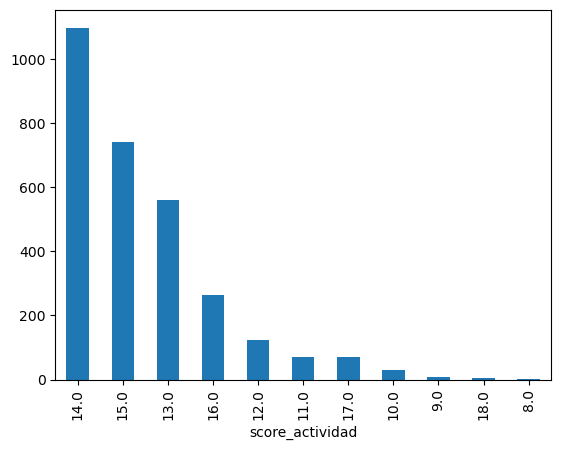

In [103]:
num['score_actividad'].value_counts().plot(kind='bar');

Como la variable no esta normalmente distribuida lo mejor es que lo impute por la mediana

De todos modos en general lo mejor suele ser imputarlo por la mediana, suele ser buena opcion en distribuciones normales y sesgadas

##### Imputar por la mediana

###### Variables a imputar

Las imputo todas al final porque solo hay dos que no tienen nulos, que en este dataset no tenga nulos no significa que en el futuro no pueda tener nulos la variable. Entonces los mejor es hacer la imputacion por la mediana a todo.

In [104]:
var_imputar_mediana = num.columns.to_list()

###### Funcion para imputar con la mediana

In [105]:
def imputar_mediana(variable):
    if pd.api.types.is_integer_dtype(variable):
        return(variable.fillna(int(variable.median())))
    else:
        return(variable.fillna(variable.median()))

###### Imputar con la mediana

In [106]:
num[var_imputar_mediana] = num[var_imputar_mediana].apply(imputar_mediana)

In [107]:
num.isna().sum().sort_values(ascending = False)

compra                   0
visitas_total            0
tiempo_en_site_total     0
paginas_vistas_visita    0
score_actividad          0
score_perfil             0
dtype: int64

todo ok

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

Este método consiste en considerar atípico todo dato que esté más alejado de la media que X desviaciones típicas.

Es uno de los métodos más clásicos. NO hay un parametro cientifico de lo que mas se deberia usar

Aunque hay que tener en cuenta que en teoría sólo se debería aplicar si la distribución de la variable es normal. Aun asi, si funciona bien, lo uso. Tampoco es tecnicamente correcto, ahora bien a nivel practico si funciona, funciona.

**Se suele usar X = 3 solo en datasets pequeños, que en una normal supondría valores fuera del 99,7% más frecuentes.**

En datasets con muchos registros se puede usar X = 4.

In [108]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [109]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #saco los nulos por ahora
    variable = variable.dropna()
    #calculo los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encuentra los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [110]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

###### Variables a aplicar

In [111]:
var_atipicos_dt = num.columns.to_list()

###### Aplicar

In [112]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


compra:

Series([], Name: count, dtype: int64)

visitas_total:

visitas_total
27     5
29     2
43     1
30     1
55     1
141    1
74     1
41     1
251    1
32     1
26     1
28     1
42     1
Name: count, dtype: Int64

tiempo_en_site_total:

Series([], Name: count, dtype: int64)

paginas_vistas_visita:

paginas_vistas_visita
12.00    5
14.00    5
13.00    4
15.00    3
55.00    1
16.00    1
12.33    1
14.50    1
11.50    1
Name: count, dtype: int64

score_actividad:

score_actividad
10.0    31
9.0      7
18.0     4
8.0      3
Name: count, dtype: int64

score_perfil:

Series([], Name: count, dtype: int64)


Visitas totales: hay un caso con 141 visitas, eso es raro. 42 visitas es raro tambien, defino un maximo de 50, mas es raro. esto me lo apunto.

paginas_vistas_visita: establezco un maximo de 20, eso ya parece raro

score_actividad:no esta muy claro como esta establecido, se supone que es algo que calcula la propia empresa asi que no toco nada.


Parecen mejor ser corregidas por Winsorizacion manual

### Winsorización Manual

In [60]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 660737 to 579533
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   compra                 5318 non-null   int64  
 1   visitas_total          5318 non-null   Int64  
 2   tiempo_en_site_total   5318 non-null   int64  
 3   paginas_vistas_visita  5318 non-null   float64
 4   score_actividad        5318 non-null   float64
 5   score_perfil           5318 non-null   float64
dtypes: Int64(1), float64(3), int64(2)
memory usage: 296.0 KB


In [113]:
num['visitas_total'].clip(0,50, inplace=True)
num['paginas_vistas_visita'].clip(0,20, inplace=True)

In [114]:
num[num.visitas_total > 50]['visitas_total'].value_counts()

Series([], Name: count, dtype: Int64)

In [115]:
cat.shape

(5318, 13)

In [116]:
num.shape

(5318, 6)

Parece todo correcto, mismo numero de registros

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en df, cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

### Definir los nombres de los archivos

In [117]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [118]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)